In [1]:
import pandas as pd

In [2]:
data1=pd.read_csv('heart.csv')
data1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


> 1. age
> 2. sex
> 3. chest pain type (4 values)
> 4. resting blood pressure
> 5. serum cholestoral in mg/dl
> 6. fasting blood sugar > 120 mg/dl
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved
> 9. exercise induced angina
> 10. oldpeak = ST depression induced by exercise relative to rest
> 11. the slope of the peak exercise ST segment
> 12. number of major vessels (0-3) colored by flourosopy
> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [3]:
data1['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [4]:
data1['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

num of pepole without heart disease: 138

num of pepole with chance for heart disease: 165

In [5]:
data1.shape

(303, 14)

In [6]:
data1=data1.drop(columns='thal')

In [7]:
data1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,1


In [8]:
X = data1.iloc[:,-1]
X

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [9]:
def chart(feature):
    Heart_disease = data1[data1['target'] == 1][feature].value_counts()
    No_Heart_disease = data1[data1['target'] == 0][feature].value_counts()
    new = pd.DataFrame([Heart_disease,No_Heart_disease])
    new.index = ['Heart_disease','No_Heart_disease']
    new.plot(kind = 'bar',figsize =(10,5))

In [10]:
data1['sex'] = data1['sex'].replace(0,'female')

In [11]:
data1['sex'] = data1['sex'].replace(1, 'male')

In [12]:
data1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
0,63,male,3,145,233,1,0,150,0,2.3,0,0,1
1,37,male,2,130,250,0,1,187,0,3.5,0,0,1
2,41,female,1,130,204,0,0,172,0,1.4,2,0,1
3,56,male,1,120,236,0,1,178,0,0.8,2,0,1
4,57,female,0,120,354,0,1,163,1,0.6,2,0,1


In [13]:
data1['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [14]:
CP = data1[data1['target'] == 1]['cp'].value_counts()
print("Patients with heart disease for various chest pain issues types: \n",CP)

Patients with heart disease for various chest pain issues types: 
 2    69
1    41
0    39
3    16
Name: cp, dtype: int64


In [15]:
chart('cp')

Here we notice that people with chest pain

0 - Have higher chances not having heart disease

1 - Hve more chances of having heart disease.

2 - Have the highest chances of having heart disease.

3 - Have the high chances of heart disease.


In [16]:
data1.corr()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
age,1.000000,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,-0.225439
cp,-0.068653,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,0.433798
trestbps,0.279351,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,-0.144931
chol,0.213678,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,-0.085239
fbs,0.121308,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.028046
restecg,-0.116211,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,0.137230
thalach,-0.398522,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,0.421741
exang,0.096801,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,-0.436757
oldpeak,0.210013,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,-0.430696
slope,-0.168814,0.119717,-0.121475,-0.004038,-0.059894,0.093045,0.386784,-0.257748,-0.577537,1.000000,-0.080155,0.345877


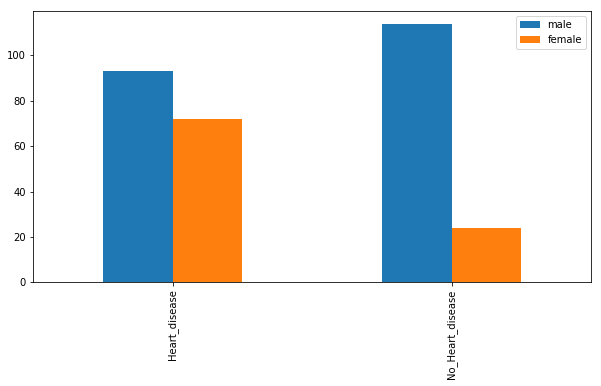

In [17]:
chart('sex')

We find that Males are less likely to have heart disease compared to Females

In [18]:
data = data1.copy()

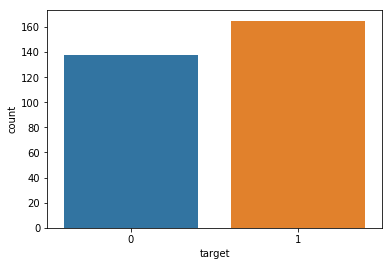

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='target',data = data1)
plt.show()

In [20]:
data['sex'] = data['sex'].replace('female',0)

In [21]:
data['sex'] = data['sex'].replace('male',1)

In [22]:
X=pd.DataFrame(data.iloc[:,:-1])
y=pd.DataFrame(data.iloc[:,-1])
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca
0,63,1,3,145,233,1,0,150,0,2.3,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0


In [23]:
y.head()

,target
0,1
1,1
2,1
3,1
4,1


In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [25]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca
34,51,1,3,125,213,0,0,125,1,1.4,2,1
185,44,1,0,112,290,0,0,153,0,0.0,2,1
187,54,1,0,124,266,0,0,109,1,2.2,1,1
147,60,0,3,150,240,0,1,171,0,0.9,2,0
202,58,1,0,150,270,0,0,111,1,0.8,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
203,68,1,2,180,274,1,0,150,1,1.6,1,0
255,45,1,0,142,309,0,0,147,1,0.0,1,3
72,29,1,1,130,204,0,0,202,0,0.0,2,0
235,51,1,0,140,299,0,1,173,1,1.6,2,0


In [26]:
from sklearn.linear_model import LogisticRegression
logmodel= LogisticRegression()
logmodel.fit(X_train,y_train)

/home/lokesh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/lokesh/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
y_pred=logmodel.predict(X_test)

In [28]:
print("Accuracy % is ",(logmodel.score(X_test,y_test)))

Accuracy % is  0.7692307692307693


In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix=confusion_matrix(y_test,y_pred)
score = accuracy_score(y_test,y_pred)

In [30]:
print("The Confusion Matrix: \n",confusion_matrix)
print("The accuracy score is: ",score)

The Confusion Matrix: 
 [[30 11]
 [10 40]]
The accuracy score is:  0.7692307692307693


In [31]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,1


In [32]:
logmodel.predict([X_train.loc[185]])

array([0])

In [33]:
data.iloc[185]

age          44.0
sex           1.0
cp            0.0
trestbps    112.0
chol        290.0
fbs           0.0
restecg       0.0
thalach     153.0
exang         0.0
oldpeak       0.0
slope         2.0
ca            1.0
target        0.0
Name: 185, dtype: float64